<p style="direction:rtl;">
داده ها از سایت ویکی پدیا که درمورد مسائل بیوانفورماتیک می‌باشد استخراج شده است. حجم فایل تمیز نشده حدود 3.3 مگابایت می‌باشد که از حدود 609 url استخراج شده است.
تعداد جملات 16458 و تعداد کلمات 323492 و تعداد کلمات منحصر به فرد 14451 می‌باشد.
</p>

In [ ]:
!pip install hazm

In [ ]:
!pip install yake

In [ ]:
!pip install git+https://github.com/Dadmatech/dadmatools.git

In [ ]:
!pip install svgling

<p style="direction:rtl;">
در این قسمت کتابخانه هایی که در طول این فایل از آن‌ها استفاده کرده‌ام import شده است.
</p>

In [1]:
import re
import pandas as pd
import numpy as np
import itertools
import yake
from nltk import FreqDist, Text, RegexpParser
from tqdm import tqdm
from hazm import *
from dadmatools.models.normalizer import Normalizer as Dadma_Normalizer


<p style="direction:rtl;">
در دو سلول بعدی فایل دیتا تمیز نشده را خوانده و ستون عدد و همچنین سطر هایی که شامل فهرست منابع ویکی پدیا و سطر هایی که طول آن‌‌ها کمتر یا مساوی یک حرف هستند را حذف می کنم. زیرا به لحاظ معنایی کاربردی ندارند.
</p>


In [2]:
pd.set_option('display.max_colwidth', None)
df = pd.read_csv('wiki_bio_unclean.csv')
df.head()

,number,text
0,0,اخترشناسی اخترفیزیک • کیهان‌شناسی اخترشناسی کهکشانی • زمین‌شناسی سیاره‌ای سیاره‌شناسی • اخترشناسی ستارگان
1,1,زیست‌شناسی کالبدشناسی • اخترزیست‌شناسی • بیوشیمی مهندسی زیستی • بیوفیزیک عصب‌شناسی رفتاری • زیست‌فناوری گیاه‌شناسی • زیست‌شناسی سلولی • سرمازیست‌شناسی زیست‌شناسی رشد بوم‌شناسی • اتنوبیولوژی زیست‌شناسی تکاملی ( مقدمه ) ژنتیک ( مقدمه ) پیری‌شناسی • ایمنی‌شناسی • لیمنولوژی زیست‌شناسی دریایی • میکروب‌شناسی زیست‌شناسی مولکولی • عصب‌شناسی دیرین‌شناسی • انگل‌شناسی • فیزیولوژی رادیوبیولوژی • زیست‌شناسی خاک زیست‌شناسی نظری • سم‌شناسی • جانورشناسی
2,2,شیمی کیمیا شیمی تجزیه اخترشیمی زیست‌شیمی بلورنگاری شیمی محیط زیست شیمی خوراک زمین‌شیمی شیمی سبز شیمی معدنی دانش مواد فیزیک مولکولی شیمی هسته‌ای شیمی آلی فوتوشیمی شیمی‌فیزیک شیمی تابشی شیمی حالت جامد شیمی فضایی شیمی فراذره‌ای علم سطح شیمی نظری
3,3,علوم زمین علوم جوی • بوم‌شناسی علم محیط زیست • ژئودزی زمین‌شناسی • ژئومورفولوژی ژئوفیزیک • یخ‌شناسی • آب‌شناسی لیمنولوژی • کانی‌شناسی • اقیانوس‌سنجی اقلیم‌شناسی • پالینولوژی جغرافیای فیزیکی • خاک‌شناسی فضاشناسی
4,4,فیزیک فیزیک کاربردی • فیزیک اتمی فیزیک محاسباتی فیزیک ماده چگال فیزیک تجربی • مکانیک فیزیک ذرات • فیزیک پلاسما مکانیک کوانتومی ( مقدمه ) مکانیک جامدات • فیزیک نظری ترمودینامیک • انتروپی نسبیت عام • نظریه-ام نسبیت خاص


In [3]:
df = df.drop('number', axis='columns')
removable = list(df['text'][0:11])
condition = df['text'].isin(removable)
df = df[~condition]
df = df[df['text'].str.len() > 1]
df.head()

,text
11,زیست‌داده‌ورزی [۱] یا بیواَنفورماتیک (به فرانسوی : Bioinformatique ) دانش استفاده از علوم رایانه و آمار و احتمالات در شاخه زیست‌شناسی مولکولی است. در چند دههٔ اخیر، پیشرفت در زیست‌شناسی مولکولی و تجهیزات مورد نیاز تحقیق در این زمینه باعث افزایش سریع تعیین توالی ژنوم و به دنبال آن ایجاد کلان داده‌ها (Big Data) بسیاری از گونه‌های موجودات شده‌است، تا جایی که پروژه‌های تعیین توالی ژنوم‌ها از پروژه‌های بسیار رایج این حوزه به حسب می‌آیند. امروزه توالی ژنوم بسیاری از موجودات ساده مانند باکتریها تا موجودات بسیار پیشرفته چون یوکاریوتهای پیچیده شناسایی شده‌است. پروژهٔ شناسایی ژنوم انسان در سال ۱۹۹۰ آغاز شد و در سال ۲۰۰۳ پایان یافت و اکنون اطلاعات کامل مربوط به توالی\nهر ۲۳ کروموزوم انسان موجود است.
12,بیوانفورماتیک یک دانش بین رشته‌ای است که شامل روش‌ها و نرم‌افزارهایی برای فهم اطلاعات زیستی است. بیوانفورماتیک به عنوان یک دانش بین رشته‌ای، به منظور تجزیه و تحلیل و تفسیر اطلاعات زیست‌شناسی ، از ترکیب علوم رایانه ، آمار ، ریاضی و مهندسی استفاده می‌کند. به عبارتی دیگر از بیوانفورماتیک برای تجزیه و تحلیل درون رایانه‌ایِ مسائل زیست‌شناسی با استفاده از تکنیک‌های ریاضی و آمار استفاده می‌شود.
13,بیوانفورماتیک از برنامه‌ریزی‌های رایانه‌ای برای تجزیه و تحلیل اختصاصی ژنومیک استفاده می‌کند. از دیگر کاربردهای متداول بیوانفورماتیک، شناسایی چند شکلی‌های تک نوکلئوتیدی ( SNPs ) و ژن‌های کاندید است. چنین شناسایی‌هایی اغلب، با هدف فهم بهتر پایه ژنتیکی بیماری‌ها، تطابق و ایجاد خواص مطلوب (به‌ویژه در گونه‌های کشاورزی) یا شناخت تفاوت‌های میان جمعیت‌ها انجام می‌شود. بیوانفورماتیک همچنین به دنبال فهم بیشتری از اصول ساختاری نوکلئیک اسیدها و توالی پروتئین‌ها در قالب علم پروتئومیکس می‌باشد.
14,در زیست‌شناسی مولکولی تجربی، تکنیک‌های بیوانفورماتیک مانند پردازش سیگنال و تصویرسازی سه بعدی منجر می‌شود مقادیر بالایی از اطلاعات خام بدست بیاید. تفسیر این اطلاعات نتایج جالبی را به ما ارائه می‌کند. برای مثال در زمینه ژنتیک و ژنومیک ، بیوانفورماتیک با طراحی پرایمر به تعیین توالی، تفسیر اطلاعات ژنومی و جهش‌های مشاهده شده در انسان کمک می‌کند. که این اطلاعات به تشخیص بیماری‌ها یا مداوای آنها کمک می‌کند.
15,بیوانفورماتیک همچنین نقش مهمی در تجزیه و تحلیل تنظیم و بیان ژن (Gene Expression) و پروتئین ایفا می‌کند. در حالت کلی بیوانفورماتیک به مقایسه ژنتیک و اطلاعات ژنومیک و به دنبال آن به فهم چگونگی تکامل زیست مولکولی کمک می‌کند. بیوانفورماتیک همچنین در شبیه‌سازی و مدلسازی رنا ، دنا [۲] [۳] و پروتئین‌ها [۴] و تعاملات زیست مولکولی کمک‌کننده است. [۵] [۶] [۷]


<p style='direction:rtl'>
در دو سلول بعدی توابع مورد نیاز برای mahdi_normalizer که ترکیبی از توابعی مثل تابع حذف لینک ها، جایگذاری کلمه "عدد" به جای اعداد متن، ... و نرمالایزر هضم می باشد نوشته شده است.
</p>

In [4]:
hazm_normalizer = Normalizer()

dadma_normalizer = Dadma_Normalizer(
    full_cleaning=True,
    unify_chars=True,
    refine_punc_spacing=True,
    remove_extra_space=True,
    remove_puncs=False,
    remove_html=False,
    remove_stop_word=False,
    replace_email_with="<EMAIL>",
    replace_number_with="<NUM>",
    replace_url_with="",
    replace_mobile_number_with=None,
    replace_emoji_with=None,
    replace_home_number_with=None,
)

def remove_reference_number(x: str)-> str:
    return re.sub(r'\[\d+\]', ' ', x)

def remove_english_character(x: str)-> str:
    return re.sub(r'[a-zA-Z]+', ' ', x)

def remove_link(x: str)-> str:
    text = re.sub(r'^https?:\/\/.[\r\n]', ' ', str(x), flags=re.MULTILINE)
    return re.sub(r'http\S+', ' ', text)

def remove_rest(x: str)-> str:
    return re.sub(r':\S+', ' ', x)

def remove_punctuation_exept_dot(x: str)-> str:
    return re.sub(r'[^\w\s.]', ' ', x)

def remove_punctuation(x: str)-> str:
    return re.sub(r'[^\w\s]', ' ', x)

def remove_number(x: str)-> str:
    return re.sub(r'\d+', ' عدد ', x)

def remove_arabic_symbols(x: str)-> str:
    return re.sub(r'[ًٌٍَُِّء]', '', x)

def only_persian_with_dot(x: str)-> str:
    return re.sub(r"[^ژضصث‌ئقفغعهخحجچپشسیبلاتنمکگظطزرذدوإؤأاآ ‌.‌]", ' ', x)

def only_persian(x: str)-> str:
    return re.sub(r"[^ژضصث‌ئقفغعهخحجچپشسیبلاتنمکگظطزرذدوإؤأاآ ‌]", ' ', x)

def hazm_normal(x: str)-> str:
    return hazm_normalizer.normalize(x)

def dadma_normal(x: str)-> str:
    return dadma_normalizer.normalize(x)

In [5]:
def mahdi_normalizer(df_old: pd.DataFrame, df_new: pd.DataFrame, column_name: str, new_column_name: str, keep_dot: bool)-> None:
  df_new[new_column_name] = df_old[column_name].apply(remove_reference_number)
  df_new[new_column_name] = df_new[new_column_name].apply(remove_reference_number)
  df_new[new_column_name] = df_new[new_column_name].apply(remove_english_character)
  df_new[new_column_name] = df_new[new_column_name].apply(remove_link)
  df_new[new_column_name] = df_new[new_column_name].apply(remove_rest)
  df_new[new_column_name] = df_new[new_column_name].apply(remove_arabic_symbols)

  if keep_dot:
    df_new[new_column_name] = df_new[new_column_name].apply(remove_punctuation_exept_dot)
  else:
    df_new[new_column_name] = df_new[new_column_name].apply(remove_punctuation)

  df_new[new_column_name] = df_new[new_column_name].apply(remove_number)
  df_new[new_column_name] = df_new[new_column_name].apply(hazm_normal)

  if keep_dot:
    df_new[new_column_name] = df_new[new_column_name].apply(only_persian_with_dot)
  else:
    df_new[new_column_name] = df_new[new_column_name].apply(only_persian)

  df_new[new_column_name] = df_new[new_column_name].apply(hazm_normal)

<p style='direction:rtl'>
در سلول بعدی با استفاده از چند نمونه، سه نرمالایزر Hazm, Dadma و Mahdi normalizer را باهم مقایسه کرده‌ام. که در نهایت با توجه نتایج Mahdi normalizer در ادامه کار از آن استفاده شده است.
</p>

In [6]:
df_sample = pd.DataFrame(data=list(df['text'][0:5]), columns=['original_text'])
df_sample['hazm_normalized'] = df_sample['original_text'].apply(hazm_normal) # Hazm
df_sample['dadma_normalized'] = df_sample['original_text'].apply(dadma_normal) # Dadma
mahdi_normalizer(df_sample, df_sample, 'original_text', 'mahdi_normalized', False) # Mahdi normalizer
df_sample

,original_text,hazm_normalized,dadma_normalized,mahdi_normalized
0,زیست‌داده‌ورزی [۱] یا بیواَنفورماتیک (به فرانسوی : Bioinformatique ) دانش استفاده از علوم رایانه و آمار و احتمالات در شاخه زیست‌شناسی مولکولی است. در چند دههٔ اخیر، پیشرفت در زیست‌شناسی مولکولی و تجهیزات مورد نیاز تحقیق در این زمینه باعث افزایش سریع تعیین توالی ژنوم و به دنبال آن ایجاد کلان داده‌ها (Big Data) بسیاری از گونه‌های موجودات شده‌است، تا جایی که پروژه‌های تعیین توالی ژنوم‌ها از پروژه‌های بسیار رایج این حوزه به حسب می‌آیند. امروزه توالی ژنوم بسیاری از موجودات ساده مانند باکتریها تا موجودات بسیار پیشرفته چون یوکاریوتهای پیچیده شناسایی شده‌است. پروژهٔ شناسایی ژنوم انسان در سال ۱۹۹۰ آغاز شد و در سال ۲۰۰۳ پایان یافت و اکنون اطلاعات کامل مربوط به توالی\nهر ۲۳ کروموزوم انسان موجود است.,زیست‌داده‌ورزی [۱] یا بیوانفورماتیک (به فرانسوی: Bioinformatique) دانش استفاده از علوم رایانه و آمار و احتمالات در شاخه زیست‌شناسی مولکولی است. در چند دهه اخیر، پیشرفت در زیست‌شناسی مولکولی و تجهیزات مورد نیاز تحقیق در این زمینه باعث افزایش سریع تعیین توالی ژنوم و به دنبال آن ایجاد کلان داده‌ها (Big Data) بسیاری از گونه‌های موجودات شده‌است، تا جایی که پروژه‌های تعیین توالی ژنوم‌ها از پروژه‌های بسیار رایج این حوزه به حسب می‌آیند. امروزه توالی ژنوم بسیاری از موجودات ساده مانند باکتریها تا موجودات بسیار پیشرفته چون یوکاریوتهای پیچیده شناسایی شده‌است. پروژه شناسایی ژنوم انسان در سال ۱۹۹۰ آغاز شد و در سال ۲۰۰۳ پایان یافت و اکنون اطلاعات کامل مربوط به توالی\nهر ۲۳ کروموزوم انسان موجود است.,زیست‌داده‌ورزی بیواَنفورماتیک فرانسوی Bioinformatique دانش علوم رایانه آمار احتمالات شاخه زیست‌شناسی مولکولی دههٔ پیشرفت زیست‌شناسی مولکولی تجهیزات نیاز تحقیق باعث افزایش تعیین توالی ژنوم دنبال ایجاد کلان داده‌ها Big Data گونه‌های موجودات شده‌است پروژه‌های تعیین توالی ژنوم‌ها پروژه‌های رایج حوزه می‌آیند توالی ژنوم موجودات باکتریها موجودات پیشرفته یوکاریوتهای پیچیده شناسایی شده‌است پروژهٔ شناسایی ژنوم انسان سال آغاز سال پایان اطلاعات مربوط توالی کروموزوم انسان موجود,زیست داده‌ورزی یا بیوانفورماتیک به فرانسوی دانش استفاده از علوم رایانه و آمار و احتمالات در شاخه زیست شناسی مولکولی است در چند دهه اخیر پیشرفت در زیست شناسی مولکولی و تجهیزات مورد نیاز تحقیق در این زمینه باعث افزایش سریع تعیین توالی ژنوم و به دنبال آن ایجاد کلان داده‌ها بسیاری از گونه‌های موجودات شده است تا جایی که پروژه‌های تعیین توالی ژنوم‌ها از پروژه‌های بسیار رایج این حوزه به حسب می‌آیند امروزه توالی ژنوم بسیاری از موجودات ساده مانند باکتریها تا موجودات بسیار پیشرفته چون یوکاریوتهای پیچیده شناسایی‌شده است پروژه شناسایی ژنوم انسان در سال عدد آغاز شد و در سال عدد پایان یافت و اکنون اطلاعات کامل مربوط به توالی هر عدد کروموزوم انسان موجود است
1,بیوانفورماتیک یک دانش بین رشته‌ای است که شامل روش‌ها و نرم‌افزارهایی برای فهم اطلاعات زیستی است. بیوانفورماتیک به عنوان یک دانش بین رشته‌ای، به منظور تجزیه و تحلیل و تفسیر اطلاعات زیست‌شناسی ، از ترکیب علوم رایانه ، آمار ، ریاضی و مهندسی استفاده می‌کند. به عبارتی دیگر از بیوانفورماتیک برای تجزیه و تحلیل درون رایانه‌ایِ مسائل زیست‌شناسی با استفاده از تکنیک‌های ریاضی و آمار استفاده می‌شود.,بیوانفورماتیک یک دانش بین‌رشته‌ای است که شامل روش‌ها و نرم‌افزارهایی برای فهم اطلاعات زیستی است. بیوانفورماتیک به عنوان یک دانش بین‌رشته‌ای، به منظور تجزیه و تحلیل و تفسیر اطلاعات زیست‌شناسی، از ترکیب علوم رایانه، آمار، ریاضی و مهندسی استفاده می‌کند. به عبارتی دیگر از بیوانفورماتیک برای تجزیه و تحلیل درون رایانه‌ای مسائل زیست‌شناسی با استفاده از تکنیک‌های ریاضی و آمار استفاده می‌شود.,بیوانفورماتیک دانش رشته‌ای شامل روش‌ها نرم‌افزارهایی فهم اطلاعات زیستی بیوانفورماتیک دانش رشته‌ای منظور تجزیه تحلیل تفسیر اطلاعات زیست‌شناسی ترکیب علوم رایانه آمار ریاضی مهندسی می‌کند عبارتی بیوانفورماتیک تجزیه تحلیل رایانه‌ایِ مسائل زیست‌شناسی تکنیک‌های ریاضی آمار,بیوانفورماتیک یک دانش بین‌رشته‌ای است که شامل روش‌ها و نرم افزارهایی برای فهم اطلاعات زیستی است بیوانفورماتیک به عنوان یک دانش بین‌رشته‌ای به منظور تجزیه و تحلیل و تفسیر اطلاعات زیست شناسی از ترکیب علوم رایانه آمار ریاضی و مهندسی استفاده می‌کند به عبارتی دیگر از بیوانفورماتیک برای تجزیه و تحلیل درون رایانه‌ای مسائل زیست شناسی با استفاده از تکنیک‌های ریاضی و آمار استفاده می

**Sentence tokenize**

<p style='direction:rtl'>
در سلول بعدی اطلاعات بعد نرمالایز شدن توسط mahdi normalizer و حذف سطر هایی که حداقل یک حرف را دارا نمی‌باشند، توسط sentence tokenizer هضم به جملات جدا تقسیم می‌شوند.
تعداد جملات نیز نشان داده شده است.
همچنین در این قسمت "." به خاطر نیاز کتابخانه هضم از متن ها حذف نشده است.
</p>

In [7]:
df_mahdi_for_sentence = pd.DataFrame()
mahdi_normalizer(df, df_mahdi_for_sentence, 'text', 'mahdi_normalized', True)
df_mahdi = df_mahdi_for_sentence[df_mahdi_for_sentence['mahdi_normalized'].str.len() > 1]
text_sentences = [sent for text in df_mahdi_for_sentence['mahdi_normalized'] for sent in sent_tokenize(text)]
df_text_sentences = pd.DataFrame(data=text_sentences, columns=['sentence'])
print('Number of sentences: ' + str(df_text_sentences.shape[0]))
df_text_sentences.head()

Number of sentences: 16458


,sentence
0,زیست داده‌ورزی یا بیوانفورماتیک به فرانسوی دانش استفاده از علوم رایانه و آمار و احتمالات در شاخه زیست شناسی مولکولی است.
1,در چند دهه اخیر پیشرفت در زیست شناسی مولکولی و تجهیزات مورد نیاز تحقیق در این زمینه باعث افزایش سریع تعیین توالی ژنوم و به دنبال آن ایجاد کلان داده‌ها بسیاری از گونه‌های موجودات شده است تا جایی که پروژه‌های تعیین توالی ژنوم‌ها از پروژه‌های بسیار رایج این حوزه به حسب می‌آیند.
2,امروزه توالی ژنوم بسیاری از موجودات ساده مانند باکتریها تا موجودات بسیار پیشرفته چون یوکاریوتهای پیچیده شناسایی‌شده است.
3,پروژه شناسایی ژنوم انسان در سال عدد آغاز شد و در سال عدد پایان یافت و اکنون اطلاعات کامل مربوط به توالی هر عدد کروموزوم انسان موجود است.
4,بیوانفورماتیک یک دانش بین‌رشته‌ای است که شامل روش‌ها و نرم افزارهایی برای فهم اطلاعات زیستی است.


<p style='direction:rtl'>
در سلول بعدی اطلاعات بعد نرمالایز شدن توسط mahdi normalizer و حذف سطر هایی که حداقل یک حرف را دارا نمی‌باشند، توسط word tokenizer هضم به کلمات جدا تقسیم می‌شوند.
</p>

In [10]:
df_mahdi_for_word = pd.DataFrame()
mahdi_normalizer(df, df_mahdi_for_word, 'text', 'mahdi_normalized', False)
df_mahdi_for_word = df_mahdi_for_word[df_mahdi_for_word['mahdi_normalized'].str.len() > 1]
text_tokens = [[word_tokenize(sent)] for sent in df_mahdi_for_word['mahdi_normalized']]
df_text_tokens = pd.DataFrame(text_tokens)
df_text_tokens.head()

,0
0,"[زیست, داده‌ورزی, یا, بیوانفورماتیک, به, فرانسوی, دانش, استفاده, از, علوم, رایانه, و, آمار, و, احتمالات, در, شاخه, زیست, شناسی, مولکولی, است, در, چند, دهه, اخیر, پیشرفت, در, زیست, شناسی, مولکولی, و, تجهیزات, مورد, نیاز, تحقیق, در, این, زمینه, باعث, افزایش, سریع, تعیین, توالی, ژنوم, و, به, دنبال, آن, ایجاد, کلان, داده‌ها, بسیاری, از, گونه‌های, موجودات, شده_است, تا, جایی, که, پروژه‌های, تعیین, توالی, ژنوم‌ها, از, پروژه‌های, بسیار, رایج, این, حوزه, به, حسب, می‌آیند, امروزه, توالی, ژنوم, بسیاری, از, موجودات, ساده, مانند, باکتریها, تا, موجودات, بسیار, پیشرفته, چون, یوکاریوتهای, پیچیده, شناسایی‌شده, است, پروژه, شناسایی, ژنوم, انسان, در, سال, عدد, آغاز, شد, و, ...]"
1,"[بیوانفورماتیک, یک, دانش, بین‌رشته‌ای, است, که, شامل, روش‌ها, و, نرم, افزارهایی, برای, فهم, اطلاعات, زیستی, است, بیوانفورماتیک, به, عنوان, یک, دانش, بین‌رشته‌ای, به, منظور, تجزیه, و, تحلیل, و, تفسیر, اطلاعات, زیست, شناسی, از, ترکیب, علوم, رایانه, آمار, ریاضی, و, مهندسی, استفاده, می‌کند, به, عبارتی, دیگر, از, بیوانفورماتیک, برای, تجزیه, و, تحلیل, درون, رایانه‌ای, مسائل, زیست, شناسی, با, استفاده, از, تکنیک‌های, ریاضی, و, آمار, استفاده, می‌شود]"
2,"[بیوانفورماتیک, از, برنامه‌ریزی‌های, رایانه‌ای, برای, تجزیه, و, تحلیل, اختصاصی, ژنومیک, استفاده, می‌کند, از, دیگر, کاربردهای, متداول, بیوانفورماتیک, شناسایی, چند, شکلی‌های, تک, نوکلئوتیدی, و, ژن‌های, کاندید, است, چنین, شناسایی‌هایی, اغلب, با, هدف, فهم, بهتر, پایه, ژنتیکی, بیماری‌ها, تطابق, و, ایجاد, خواص, مطلوب, به, ویژه, در, گونه‌های, کشاورزی, یا, شناخت, تفاوت‌های, میان, جمعیت‌ها, انجام, می‌شود, بیوانفورماتیک, همچنین, به, دنبال, فهم, بیشتری, از, اصول, ساختاری, نوکلئیک, اسیدها, و, توالی, پروتئین‌ها, در, قالب, علم, پروتئومیکس, می‌باشد]"
3,"[در, زیست, شناسی, مولکولی, تجربی, تکنیک‌های, بیوانفورماتیک, مانند, پردازش, سیگنال, و, تصویرسازی, سه‌بعدی, منجر, می‌شود, مقادیر, بالایی, از, اطلاعات, خام, بدست, بیاید, تفسیر, این, اطلاعات, نتایج, جالبی, را, به, ما, ارائه, می‌کند, برای, مثال, در, زمینه, ژنتیک, و, ژنومیک, بیوانفورماتیک, با, طراحی, پرایمر, به, تعیین, توالی, تفسیر, اطلاعات, ژنومی, و, جهش‌های, مشاهده‌شده, در, انسان, کمک, می‌کند, که, این, اطلاعات, به, تشخیص, بیماری‌ها, یا, مداوای, آنها, کمک, می‌کند]"
4,"[بیوانفورماتیک, همچنین, نقش, مهمی, در, تجزیه, و, تحلیل, تنظیم, و, بیان, ژن, و, پروتئین, ایفا, می‌کند, در, حالت, کلی, بیوانفورماتیک, به, مقایسه, ژنتیک, و, اطلاعات, ژنومیک, و, به, دنبال, آن, به, فهم, چگونگی, تکامل, زیست, مولکولی, کمک, می‌کند, بیوانفورماتیک, همچنین, در, شبیه‌سازی, و, مدلسازی, رنا, دنا, و, پروتئین‌ها, و, تعاملات, زیست, مولکولی, کمک‌کننده, است]"


**Frequency analysis**

<p style='direction:rtl'>
در دو سلول بعدی اطلاعات میزان تکرار و اطلاعات کلی درمورد داده ها نشان داده شده است.
</p>

In [15]:
tokens = list(itertools.chain(*itertools.chain(*text_tokens)))
freq_analysis = pd.DataFrame(data=FreqDist(tokens).most_common(25), columns=['word', 'freq'])
freq_analysis

,word,freq
0,در,11658
1,به,10921
2,و,10130
3,از,9277
4,عدد,7651
5,که,7220
6,است,5410
7,این,5281
8,را,4406
9,یک,4396


In [16]:
print('%-16s' % 'Number of words', '%-16s' % len(tokens))
print('%-16s' % 'Number of unique words', '%-16s' % len(set(tokens)))
avg = np.sum([len(word) for word in tokens])/len(tokens)
print('%-16s' % 'Average word length', '%-16s' % avg)
print('%-16s' % 'Longest word', '%-16s' % tokens[np.argmax([len(word) for word in tokens])])

Number of words  323492          
Number of unique words 14451           
Average word length 4.4334295747653725
Longest word     ریبونوکلئوپروتئین‌های


**Stop word removal**

<p style='direction:rtl'>
در دو سلول بعدی استاپ ورد های کتابخانه هضم در یک لیست ذخیره و آن‌ها از لیست کلمات دیتاست خارج میکنم. و در ادامه میزان تکرار آن نشان داده شده است.
</p>

In [17]:
stop_path = 'stopwords.txt'
with open(stop_path, 'r') as f:
  stopwords = [hazm_normalizer.normalize(x.strip()) for x in f.readlines()]
stopwords[0:5]

['و', 'ز', 'در', 'به', 'از']

In [20]:
all_tokens_nonstop = [t for t in tqdm(tokens) if t not in stopwords]
freq_analysis_nonstop = pd.DataFrame(data=FreqDist(all_tokens_nonstop).most_common(25), columns=['word', 'freq'])
freq_analysis_nonstop

100%|██████████| 323492/323492 [00:03<00:00, 90566.73it/s]


,word,freq
0,عدد,7651
1,استفاده,1819
2,ان,1662
3,دی,1632
4,ای,1592
5,ژن,1327
6,توالی,1119
7,پروتئین,934
8,ژنتیکی,892
9,آن‌ها,846


**Adding custom stopwords**

<p style='direction:rtl'>
در سلول بعدی با تحلیل کلمات باقی مانده کلمات دیگری هم به لیست stopword اضافه شده است. و در ادامه از داده ها حذف شده اند.
</p>

In [21]:
stopwords.extend(['عدد', 'آن‌ها', 'سال', 'فرانسوی', 'انگلیسی', 'ویکی', 'پدیا'])
all_tokens_nonstop = [t for t in tqdm(tokens) if t not in stopwords]
freq_analysis_nonstop = pd.DataFrame(data=FreqDist(all_tokens_nonstop).most_common(25), columns=['word', 'freq'])
freq_analysis_nonstop

100%|██████████| 323492/323492 [00:02<00:00, 119023.51it/s]


,word,freq
0,استفاده,1819
1,ان,1662
2,دی,1632
3,ای,1592
4,ژن,1327
5,توالی,1119
6,پروتئین,934
7,ژنتیکی,892
8,صورت,822
9,قرار,805


**Stemmer and Lemmatizer**

<p style='direction:rtl'>
در دو سلول بعدی دو کار stemmer , lemmatizer اجرا و تفاوت آن‌ها بررسی شده است. که با توجه به نتایج lemmatizer نتایج بهتری می دهد.
</p>

In [24]:
stemmer = Stemmer()
lemmatizer = Lemmatizer()

def get_lemma_set(tok, mode=1):
    if mode ==1:
        return stemmer.stem(tok)
    if mode ==2:
        return lemmatizer.lemmatize(tok)

In [23]:
all_tokens_nonstop_stem = [get_lemma_set(t, 1) for t in tqdm(all_tokens_nonstop)]
all_tokens_nonstop_lem = [get_lemma_set(t, 2) for t in tqdm(all_tokens_nonstop)]

dataframe_nonstop_lemstem = {}

dataframe_nonstop_lemstem['lem'] = FreqDist(all_tokens_nonstop_lem).most_common(25)
dataframe_nonstop_lemstem['stem'] = FreqDist(all_tokens_nonstop_stem).most_common(25)

freq_analysis_nonstop_lemstem = pd.DataFrame(dataframe_nonstop_lemstem)
freq_analysis_nonstop_lemstem

100%|██████████| 167381/167381 [00:00<00:00, 522125.49it/s]


,lem,stem
0,"(ژن, 2483)","(ژن, 2483)"
1,"(سلول, 1952)","(سلول, 1952)"
2,"(پروتئین, 1904)","(پروتئین, 1904)"
3,"(استفاده, 1829)","(استفاده, 1829)"
4,"(ان, 1662)","(, 1755)"
5,"(ای, 1643)","(د, 1668)"
6,"(دی, 1632)","(ا, 1647)"
7,"(توالی, 1586)","(ژنتیک, 1398)"
8,"(مولکول, 1068)","(توال, 1119)"
9,"(صورت, 900)","(مولکول, 1068)"


**POS tager**

<p style='direction:rtl'>
در سلول بعدی کلمات هر جمله از دیتاست را جدا کرده و به هر کدام از کلمات pos را مشخص می کند.
</p>

In [25]:
tagger = POSTagger(model='pos_tagger.model')
tags = [[tagger.tag(word_tokenize(sentence))] for sentence in text_sentences]
df_tags = pd.DataFrame(tags, columns=['tags'])
df_tags.head()

,tags
0,"[(زیست, NOUN,EZ), (داده‌ورزی, NOUN), (یا, CCONJ), (بیوانفورماتیک, NOUN), (به, ADP), (فرانسوی, NOUN,EZ), (دانش, NOUN), (استفاده, NOUN), (از, ADP), (علوم, NOUN,EZ), (رایانه, NOUN), (و, CCONJ), (آمار, NOUN), (و, CCONJ), (احتمالات, NOUN), (در, ADP), (شاخه, NOUN,EZ), (زیست, NOUN,EZ), (شناسی, NOUN,EZ), (مولکولی, ADJ), (است, VERB), (., PUNCT)]"
1,"[(در, ADP), (چند, DET), (دهه, NOUN,EZ), (اخیر, ADJ,EZ), (پیشرفت, NOUN), (در, ADP), (زیست, NOUN,EZ), (شناسی, NOUN,EZ), (مولکولی, ADJ), (و, CCONJ), (تجهیزات, NOUN,EZ), (مورد, NOUN,EZ), (نیاز, NOUN,EZ), (تحقیق, NOUN), (در, ADP), (این, DET), (زمینه, NOUN), (باعث, ADJ,EZ), (افزایش, NOUN,EZ), (سریع, ADJ,EZ), (تعیین, NOUN,EZ), (توالی, NOUN,EZ), (ژنوم, NOUN), (و, CCONJ), (به, ADP), (دنبال, NOUN,EZ), (آن, PRON), (ایجاد, NOUN,EZ), (کلان, NOUN,EZ), (داده‌ها, NOUN), (بسیاری, DET), (از, ADP), (گونه‌های, NOUN,EZ), (موجودات, NOUN), (شده_است, VERB), (تا, ADP), (جایی, NOUN), (که, SCONJ), (پروژه‌های, NOUN,EZ), (تعیین, NOUN,EZ), (توالی, NOUN,EZ), (ژنوم‌ها, NOUN), (از, ADP), (پروژه‌های, NOUN,EZ), (بسیار, ADV), (رایج, ADJ,EZ), (این, DET), (حوزه, NOUN), (به, ADP), (حسب, NOUN), (می‌آیند, VERB), (., PUNCT)]"
2,"[(امروزه, ADV), (توالی, NOUN,EZ), (ژنوم, NOUN,EZ), (بسیاری, DET), (از, ADP), (موجودات, NOUN,EZ), (ساده, ADJ), (مانند, ADV,EZ), (باکتریها, NOUN), (تا, ADP), (موجودات, NOUN,EZ), (بسیار, ADV), (پیشرفته, ADJ), (چون, ADV), (یوکاریوتهای, NOUN,EZ), (پیچیده, ADJ,EZ), (شناسایی‌شده, ADJ), (است, VERB), (., PUNCT)]"
3,"[(پروژه, NOUN,EZ), (شناسایی, NOUN,EZ), (ژنوم, NOUN,EZ), (انسان, NOUN), (در, ADP), (سال, NOUN,EZ), (عدد, NOUN), (آغاز, NOUN), (شد, VERB), (و, CCONJ), (در, ADP), (سال, NOUN,EZ), (عدد, NOUN), (پایان, NOUN), (یافت, VERB), (و, CCONJ), (اکنون, ADV), (اطلاعات, NOUN,EZ), (کامل, ADJ,EZ), (مربوط, ADJ), (به, ADP), (توالی, NOUN,EZ), (هر, DET), (عدد, NOUN), (کروموزوم, NOUN,EZ), (انسان, NOUN), (موجود, ADJ), (است, VERB), (., PUNCT)]"
4,"[(بیوانفورماتیک, NOUN,EZ), (یک, NUM), (دانش, NOUN), (بین‌رشته‌ای, ADJ), (است, VERB), (که, SCONJ), (شامل, ADJ,EZ), (روش‌ها, NOUN), (و, CCONJ), (نرم, ADJ,EZ), (افزارهایی, NOUN), (برای, ADP,EZ), (فهم, NOUN,EZ), (اطلاعات, NOUN,EZ), (زیستی, ADJ), (است, VERB), (., PUNCT)]"


**Concordance**

<p style='direction:rtl'>
در سلول بعدی با استفاده از کتابخانه nltk شباهت متن ها در کلمه "بیوانفورماتیک" بررسی شده است.
</p>

In [26]:
bio_text = Text(all_tokens_nonstop)
bio_text.concordance('بیوانفورماتیک')

Displaying 25 of 148 matches:
زیست داده‌ورزی بیوانفورماتیک دانش استفاده علوم رایانه آمار اح
لاعات توالی کروموزوم انسان موجود بیوانفورماتیک دانش بین‌رشته‌ای روش‌ها نرم افزا
 نرم افزارهایی فهم اطلاعات زیستی بیوانفورماتیک عنوان دانش بین‌رشته‌ای تجزیه تحل
آمار ریاضی مهندسی استفاده عبارتی بیوانفورماتیک تجزیه تحلیل رایانه‌ای مسائل زیست
اده تکنیک‌های ریاضی آمار استفاده بیوانفورماتیک برنامه‌ریزی‌های رایانه‌ای تجزیه 
 ژنومیک استفاده کاربردهای متداول بیوانفورماتیک شناسایی شکلی‌های تک نوکلئوتیدی ژ
ی شناخت تفاوت‌های جمعیت‌ها انجام بیوانفورماتیک دنبال فهم اصول ساختاری نوکلئیک ا
ست شناسی مولکولی تجربی تکنیک‌های بیوانفورماتیک پردازش سیگنال تصویرسازی سه‌بعدی 
بی ارائه مثال زمینه ژنتیک ژنومیک بیوانفورماتیک طراحی پرایمر توالی تفسیر اطلاعات
لاعات تشخیص بیماری‌ها مداوای کمک بیوانفورماتیک نقش مهمی تجزیه تحلیل تنظیم ژن پر
تحلیل تنظیم ژن پروتئین ایفا حالت بیوانفورماتیک مقایسه ژنتیک اطلاعات ژنومیک دنبا
هم چگونگی تکامل زیست مولکولی کمک بیوانفورماتیک شبیه‌سازی مدلسازی رنا دنا پروتئی
بازیابی تحلیل داده‌ها پیدایش

**Chunk**

<p style='direction:rtl'>
در چند سلول بعدی عبارت هایی که در متن وجود دارند، استخراج شده است.
</p>

In [29]:
def vasf_ext(sentence):
    grammar = r"""
      NVASF: {<NOUN|NOUN,EZ><ADJ>}
      GHEIDV: {<ADV><VERB>}
    """
    cp = RegexpParser(grammar)
    return (cp.parse(sentence))

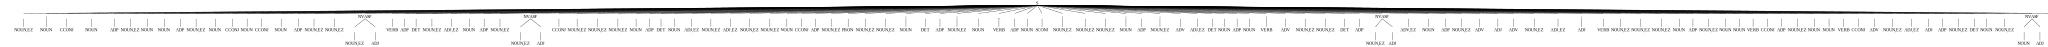

In [30]:
vasf_ext(tagger.tag(text_tokens[0][0]))

In [31]:
mosufs = []
gheids = []
for sentence in tqdm(text_tokens):
    tree=vasf_ext(tagger.tag(sentence[0]))
    for subtree in tree.subtrees():
        if subtree.label() == 'NVASF':
            mosufs.append(subtree.leaves())
        if subtree.label() == 'GHEIDV':
            gheids.append(subtree.leaves())

100%|██████████| 5404/5404 [00:13<00:00, 403.25it/s]


In [37]:
mosuf_texts = [' '.join([x[0],y[0]]) for x,y in mosufs]
pd.DataFrame(FreqDist(mosuf_texts).most_common(25), columns=['chunk', 'freq'])

,chunk,freq
0,طور کلی,94
1,شناسی مولکولی,82
2,گرایش جنسی,82
3,حال حاضر,74
4,طور معمول,66
5,تعداد زیادی,65
6,جفت باز,58
7,عدد میلادی,57
8,اسید آمینه,54
9,اطلاعات ژنتیکی,45


In [38]:
gheids_texts = [' '.join([x[0],y[0]]) for x,y in gheids]
pd.DataFrame(FreqDist(gheids_texts).most_common(25), columns=['chunk', 'freq'])

,chunk,freq
0,پیش می‌رود,7
1,اینطور نیست,6
2,ابتدا باید,5
3,درست نمایی,4
4,حتما باید,4
5,تنها می‌تواند,4
6,بسیار کوتاه‌اند,3
7,همچنان می‌تواند,3
8,معمولا است,3
9,اکنون می‌توان,3


**Keyword extraction**

<p style='direction:rtl'>
در سلول بعدی تسک keyword extraction با استفاده از کتابخانه yake انجام شده است.
</p>

In [41]:
all_text = ' '.join(all_tokens_nonstop)
kw_extractor = yake.KeywordExtractor()
keywords = kw_extractor.extract_keywords(all_text)

for kw in keywords:
	print(kw)

('زیست شناسی مولکولی', 1.222789433731833e-08)
('خرد زیست شناسی', 1.487096071719357e-08)
('زیست شناسی می\u200cتوانید', 1.5614863298168664e-08)
('شناسی می\u200cتوانید گسترش', 2.7609040952352712e-08)
('می\u200cتوانید گسترش کمک', 3.051298153374067e-08)
('مقاله خرد زیست', 3.13676178180726e-08)
('زیست شناسی محاسباتی', 4.464192875428691e-08)
('توالی یابی ژنوم', 6.41489855832272e-08)
('آران\u200cای پلی مراز', 8.24721580170335e-08)
('زیست شناسی سلولی', 8.922576622265285e-08)
('توالی ژنوم انسان', 1.2994726077748906e-07)
('استفاده قرار می\u200cگیرند', 1.3458178607934647e-07)
('استفاده زیست شناسی', 1.3847101772617056e-07)
('پروژه ژنوم انسان', 1.491750007874e-07)
('شناسی مولکولی ژنتیک', 1.624957657128356e-07)
('زیست شناسی ژنتیک', 1.6537425736199453e-07)
('توالی یابی آران\u200cای', 1.7780243576453624e-07)
('کمک زیست شناسی', 1.7815741917617008e-07)
('بیوانفورماتیک زیست شناسی', 1.7827631874954696e-07)
('مولکولی زیست شناسی', 1.8167157301158656e-07)
